In [1]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.3 MB 3.8 kB/s 
     |████████████████████████████████| 454 kB 71.3 MB/s 
     |████████████████████████████████| 26.0 MB 1.2 MB/s 
     |████████████████████████████████| 3.0 MB 65.3 MB/s 
     |████████████████████████████████| 2.9 MB 62.2 MB/s 
     |████████████████████████████████| 152 kB 77.8 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.15.0
    Uninstalling google-auth-2.15.0:
      Successfully uninstalled google-auth-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
 

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy


In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
batch_size = 32
num_classes = 10
epochs = 50
y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
filepath='weights0.{epoch:02d}-{val_loss:.2f}.hdf5'
CB=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,callbacks=[CB],validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 156s 124ms/step - loss: 1.9677 - acc: 0.2693 - val_loss: 1.6893 - val_acc: 0.3961
Epoch 2/50
1250/1250 [==============================] - 156s 125ms/step - loss: 1.6642 - acc: 0.3895 - val_loss: 1.5539 - val_acc: 0.4302
Epoch 3/50
1250/1250 [==============================] - 155s 124ms/step - loss: 1.5462 - acc: 0.4370 - val_loss: 1.4646 - val_acc: 0.4785
Epoch 4/50
1250/1250 [==============================] - 158s 126ms/step - loss: 1.4564 - acc: 0.4724 - val_loss: 1.3154 - val_acc: 0.5349
Epoch 5/50
1250/1250 [==============================] - 158s 126ms/step - loss: 1.3875 - acc: 0.4999 - val_loss: 1.2654 - val_acc: 0.5481
Epoch 6/50
1250/1250 [==============================] - 156s 125ms/step - loss: 1.3323 - acc: 0.5239 - val_loss: 1.2195 - val_acc: 0.5677
Epoch 7/50
1250/1250 [==============================] - 158s 127ms/step - loss: 1.2811 - acc: 0.5452 - val_loss: 1.2583 - val_acc: 0.5575
Epoch 8/50
1250/1250 [============

313/313 - 25s - loss: 0.7074 - acc: 0.7598


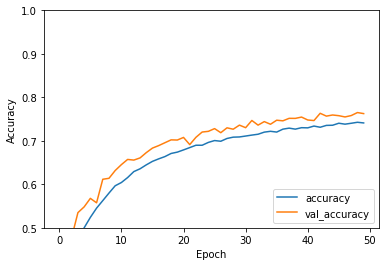

In [12]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

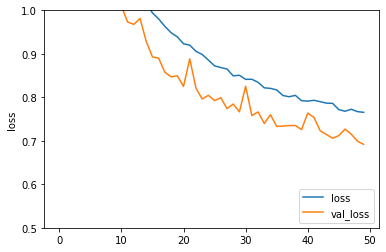

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [18]:
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

[[0.76392823 0.01892148 0.0591133  0.01707317 0.01386139 0.
  0.00634058 0.01520913 0.03650442 0.02763562]
 [0.01322002 0.85714286 0.00394089 0.00121951 0.0009901  0.00199601
  0.00452899 0.00190114 0.01106195 0.05629478]
 [0.06610009 0.0037843  0.63349754 0.0402439  0.08316832 0.06586826
  0.05706522 0.02661597 0.00442478 0.00511771]
 [0.01416431 0.01040681 0.07783251 0.64268293 0.05643564 0.16866267
  0.07336957 0.03897338 0.00774336 0.01330604]
 [0.01322002 0.00283822 0.06600985 0.05       0.71287129 0.02195609
  0.04891304 0.06844106 0.00553097 0.00204708]
 [0.0075543  0.00283822 0.05024631 0.15609756 0.04752475 0.66167665
  0.02445652 0.0608365  0.00331858 0.00511771]
 [0.00661001 0.00283822 0.04729064 0.04268293 0.03366337 0.01996008
  0.76721014 0.00380228 0.00221239 0.        ]
 [0.01227573 0.         0.04433498 0.02682927 0.04356436 0.05289421
  0.00634058 0.77091255 0.00110619 0.00409417]
 [0.07082153 0.03122044 0.01182266 0.01097561 0.00594059 0.00598802
  0.00724638 0.00475

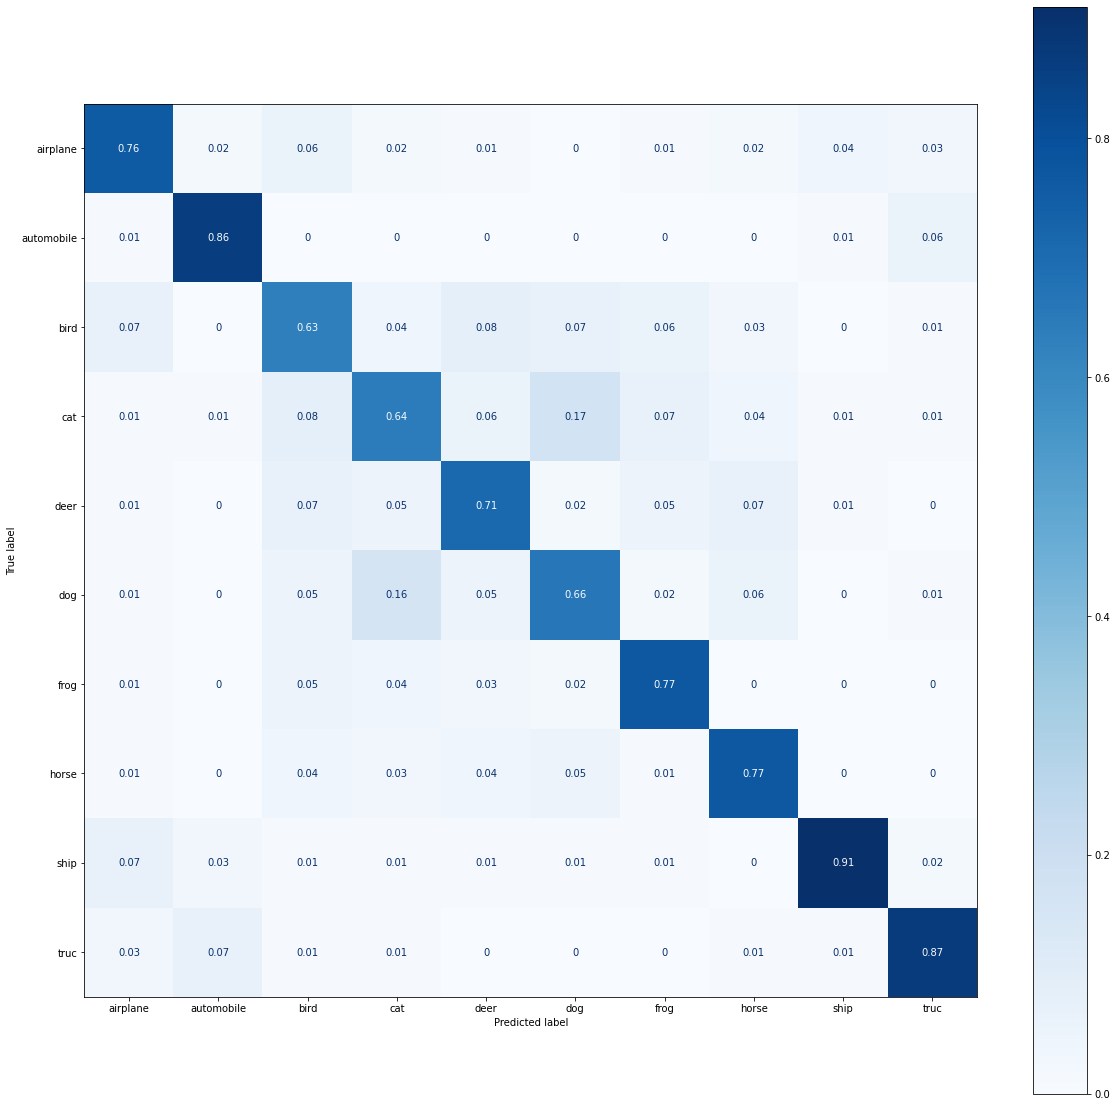

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
result = np.round_(result,decimals=2)
labels=['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truc']
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=labels)
plt.rcParams["figure.figsize"] = (20,20)
disp.plot(cmap=plt.cm.Blues)
plt.show()